<a href="https://colab.research.google.com/github/Calisti-Daniele/Fifa-Youth-Growth-Prediction/blob/main/Fifa_Youth_Growth_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow scikit-learn scikeras seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=632837876fdb40895619b0ca6f2fd10cd4432dc22759c547ad9aec9be1b00168
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for sharp
  Running setup.py clean for sharp
Successfully built eli5
Failed to build sharp
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (sharp)


---
# **Perché ho scelto l'algoritmo LSTM 🌟**

L'uso dell'**algoritmo LSTM (Long Short-Term Memory)** per la nostra analisi è strategico e ben motivato.

Ecco perché:

* **Gestione delle sequenze temporali: 📅**
Le LSTM sono progettate per lavorare con dati sequenziali, perfette per il nostro dataset che contiene statistiche di calciatori nel tempo, dal 2015 al 2023. Questo modello riesce a catturare le dipendenze temporali, analizzando come le performance dei giocatori si evolvono con le diverse versioni di FIFA.

* **Memoria a lungo termine: 💡**
A differenza delle reti neurali tradizionali, le LSTM possono mantenere informazioni significative per lunghi periodi. Questo è fondamentale quando si lavora con dati che mostrano trend e pattern nel tempo, garantendo che le informazioni rilevanti non vengano dimenticate durante l’addestramento.

* **Robustezza alle fluttuazioni: 🔄**
Grazie alla loro architettura, le LSTM sono meno suscettibili al problema del vanishing gradient. Questo significa che possono apprendere da sequenze più lunghe senza perdere di vista le informazioni chiave, offrendo così previsioni più accurate e affidabili.

* **Eccellenza predittiva: 🔮**
Le LSTM sono state ampiamente utilizzate in vari domini, dalla finanza alla traduzione automatica, e hanno dimostrato di eccellere nella previsione di valori futuri. Applicando questo algoritmo alle statistiche dei calciatori, possiamo ottenere previsioni più precise sul loro potenziale e sulle loro performance future.

In sintesi, l’adozione dell’**algoritmo LSTM**- rappresenta un passo fondamentale per la nostra analisi, permettendoci di sfruttare al meglio la ricchezza temporale del nostro dataset e ottenere risultati significativi nel contesto della nostra ricerca. 🚀

---

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


---
# Primo passo: **preprocessing dei dati** 📊

Il **preprocessing dei dati** è un passo cruciale nel progetto, poiché garantisce che i dati siano pronti per l'analisi e l'addestramento del modello. Ecco i dettagli del processo:

* **Analisi Iniziale**: 🧐  
  Prima di tutto, abbiamo caricato il dataset utilizzando `pandas`. Abbiamo eseguito un'analisi iniziale per comprendere la dimensione del dataset, visualizzando le prime righe e ottenendo informazioni generali, comprese le statistiche descrittive. Queste informazioni sono fondamentali per avere un quadro chiaro dei dati disponibili.

* **Gestione dei Valori Nulli**: 🚫  
  Abbiamo controllato la presenza di valori nulli nel dataset. Questi possono influenzare negativamente le prestazioni del modello, quindi abbiamo scelto di sostituire i valori nulli nelle colonne numeriche con la **media** della rispettiva colonna. Questo approccio consente di mantenere intatti i dati senza introdurre distorsioni significative.

* **Normalizzazione dei Dati**: ⚖️  
  La normalizzazione è essenziale per garantire che le variabili abbiano la stessa scala, evitando che alcune feature influenzino eccessivamente il modello. Abbiamo selezionato le colonne numeriche e abbiamo utilizzato `StandardScaler` di `scikit-learn` per normalizzare i dati. Questo processo trasforma le feature affinché abbiano media zero e varianza uno, migliorando così l'efficacia dell'addestramento del modello.

* **Analisi Finale**: 🔍  
  Dopo il preprocessing, abbiamo effettuato un'analisi finale per assicurarci che non ci fossero più valori nulli e per visualizzare le prime righe del dataset preprocessato. Questa fase è importante per confermare che le operazioni di preprocessing siano state eseguite correttamente e che i dati siano pronti per il successivo addestramento del modello.

* **Salvataggio del Dataset**: 💾  
  Infine, abbiamo salvato il dataset preprocessato in un nuovo file CSV, garantendo che i dati preparati fossero facilmente accessibili per le fasi successive del progetto.

---

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carico il dataset
df = pd.read_csv('dataset_fifa_15_23.csv')

# 1. Analisi iniziale
print("Dimensione del dataset:", df.shape)
print("Prime righe del dataset:\n", df.head())
print("Informazioni sul dataset:\n", df.info())
print("Statistiche descrittive:\n", df.describe())

# 2. Gestione dei valori nulli
print("Valori nulli per colonna:\n", df.isnull().sum())

Dimensione del dataset: (113938, 54)
Prime righe del dataset:
                                           player_url   short_name  \
0  https://sofifa.com/player/204346/federico-vico...    Fede Vico   
1  https://sofifa.com/player/204451/koray-gunter/...    K. Günter   
2  https://sofifa.com/player/205618/sandy-walsh/1...     S. Walsh   
3  https://sofifa.com/player/206518/callum-robins...  C. Robinson   
4  https://sofifa.com/player/207593/jere-uronen/1...    J. Uronen   

                long_name player_positions  overall  potential  age  \
0  Federico Vico Villegas  LM, CAM, RM, ST       70         76   23   
1            Koray Günter               CB       70         75   23   
2             Sandy Walsh   RB, CB, CM, LB       70         75   23   
3         Callum Robinson       LM, ST, LW       70         79   23   
4      Jere Juhani Uronen               LB       70         75   23   

   height_cm  weight_kg          club_name  ... defending_marking_awareness  \
0        167    

In [ ]:
# Sostituisco valori nulli con la media
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# 3. Normalizzazione dei dati
# Seleziono le colonne numeriche per la normalizzazione
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = StandardScaler()

# Normalizzazione dei dati
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
# 4. Analisi finale
print("Dopo il preprocessing:")
print("Valori nulli per colonna:\n", df.isnull().sum())
print("Prime righe del dataset preprocessato:\n", df.head())

print(df.describe())

Dopo il preprocessing:
Valori nulli per colonna:
 player_url                       0
short_name                       0
long_name                        0
player_positions                 0
overall                          0
potential                        0
age                              0
height_cm                        0
weight_kg                        0
club_name                      294
league_name                    294
nationality_name                 0
preferred_foot                   0
shooting                         0
passing                          0
dribbling                        0
defending                        0
physic                           0
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill

---

# Feature Selection 🔍

La **feature selection** è un passaggio fondamentale nel progetto, poiché permette di identificare le variabili più significative che influenzano i target di interesse. Ecco come abbiamo affrontato questa fase:

* **Visualizzazione della Matrice di Correlazione**: 📊  
  Abbiamo utilizzato `seaborn` e `matplotlib` per visualizzare la matrice di correlazione tra le feature selezionate e i target. La matrice di correlazione fornisce un'analisi visiva di come ciascuna variabile è correlata con le altre, facilitando l'identificazione di relazioni significative.

* **Calcolo della Correlazione**: ⚖️  
  Abbiamo calcolato la correlazione tra le colonne delle feature e i target utilizzando il metodo `corr()`. Questo passaggio è cruciale per comprendere come ogni feature contribuisce alla previsione delle statistiche dei calciatori.

* **Selezione delle Feature**: ✅  
  Basandoci sui valori di correlazione ottenuti, abbiamo definito una soglia di correlazione di **0.4**. Questo significa che abbiamo selezionato le feature che mostrano una correlazione assoluta maggiore di 0.4 con almeno uno dei target. Questa soglia ci consente di concentrarci su variabili che hanno un impatto significativo, migliorando l'efficacia del modello.

* **Identificazione delle Feature Selezionate**: 📋  
  Alla fine, abbiamo stampato l'elenco delle feature selezionate, fornendo un chiaro quadro delle variabili che utilizzeremo nel modello. Questo approccio assicura che il modello si concentri sulle feature più rilevanti, ottimizzando così le sue prestazioni.

---

In [3]:
# Caricamento del dataset
df = pd.read_csv('dataset_fifa_15_23_preprocessed.csv')

# Definizione delle colonne da usare per feature e target
cols_features = ['age', 'height_cm', 'weight_kg', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
                 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
                 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
                 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
                 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
                 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle',
                 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']
cols_targets = ['overall', 'potential']



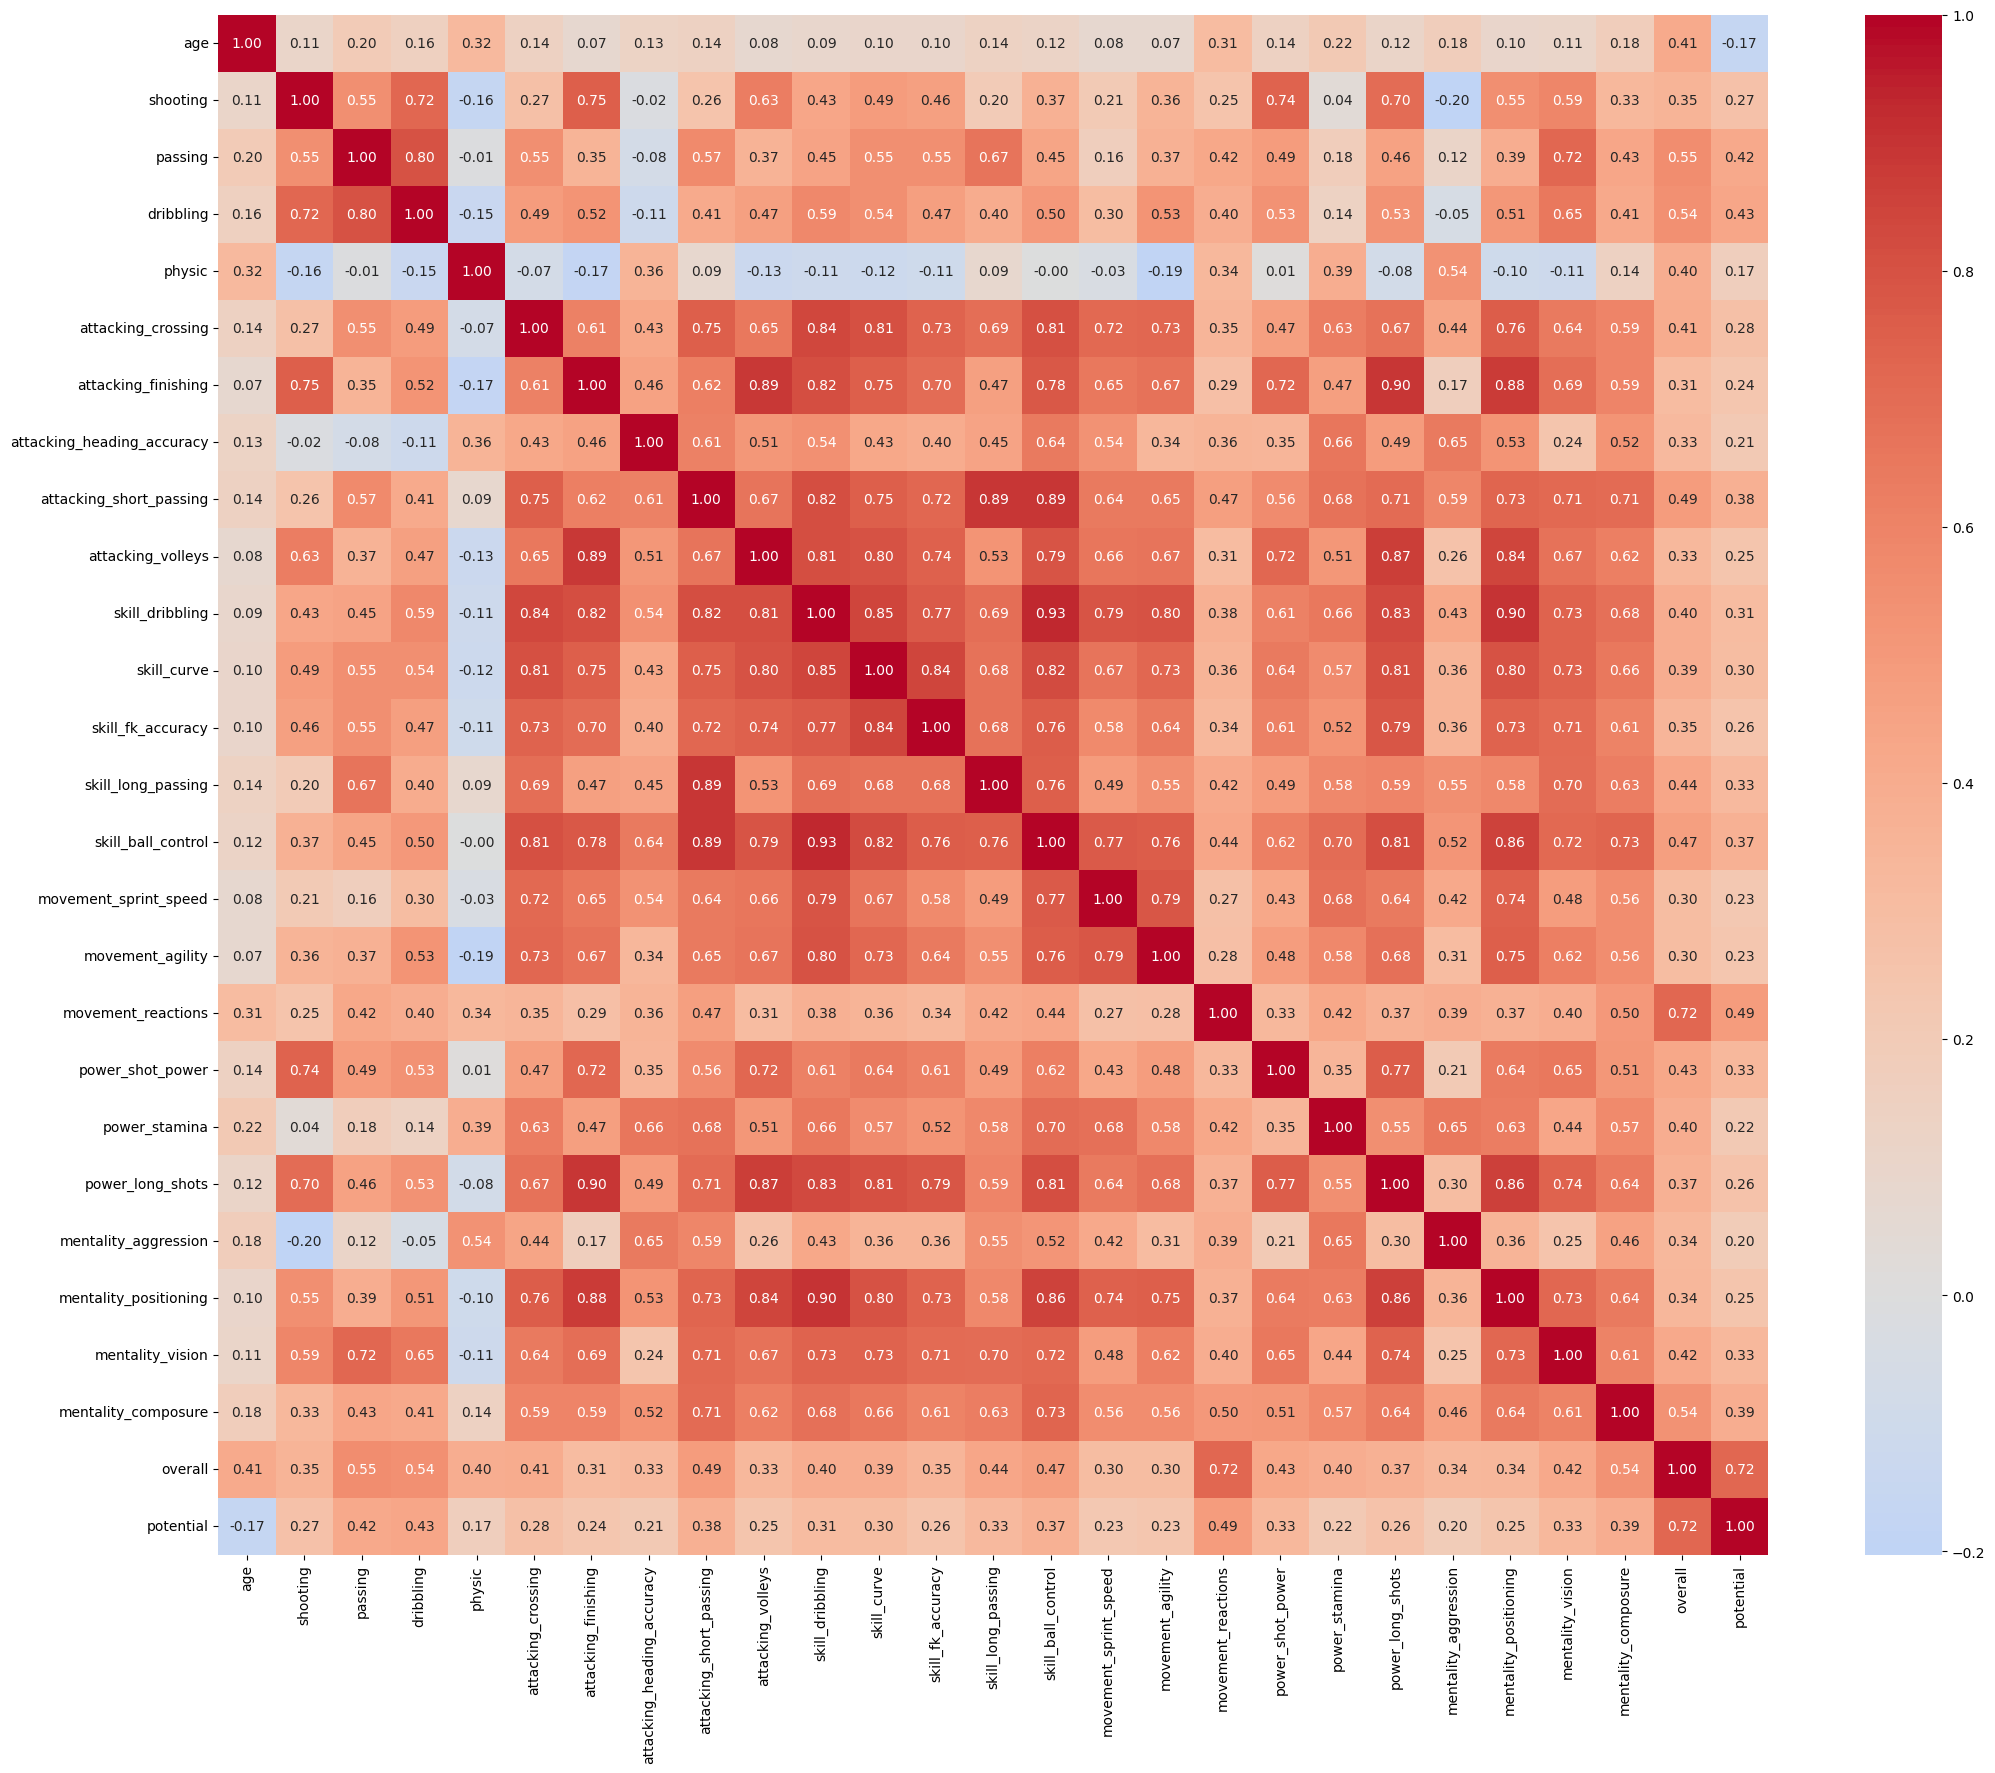

Feature selezionate: ['age', 'passing', 'dribbling', 'attacking_crossing', 'attacking_short_passing', 'skill_long_passing', 'skill_ball_control', 'movement_reactions', 'power_shot_power', 'mentality_vision', 'mentality_composure']


In [8]:
# Visualizzazione della matrice di correlazione
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolo della correlazione
correlation_matrix = df[cols_features + cols_targets].corr()

plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.show()

# Selezione feature basate sulla correlazione con gli obiettivi
threshold = 0.4  # Soglia di correlazione
selected_features = [col for col in cols_features if any(abs(correlation_matrix[col][target]) > threshold for target in cols_targets)]
print("Feature selezionate:", selected_features)

---

# Feature Importance - **Secondo metodo**⚙️

La **Feature Importance** è uno strumento cruciale per comprendere quali caratteristiche del nostro dataset influenzano maggiormente le previsioni del modello. In questa fase del progetto, abbiamo analizzato l'importanza delle feature con l'obiettivo di identificare quelle più rilevanti.

* **Metodo della Permutazione**: 🔁  
  Abbiamo utilizzato l'algoritmo di **Permutazione delle Feature** per calcolare l'importanza delle variabili. Questo metodo valuta quanto l'accuratezza del modello viene influenzata dalla permutazione casuale dei valori di ciascuna feature, fornendo un'indicazione diretta dell'impatto di ogni variabile.

* **Calcolo delle Importanze**: 📐  
  Dopo aver addestrato il modello, abbiamo calcolato il punteggio di base utilizzando il **Mean Squared Error (MSE)** sui dati di test. Successivamente, abbiamo permutato i valori delle feature una alla volta e ricalcolato il MSE per determinare l'aumento dell'errore causato dalla permutazione. Questo incremento ci dà una misura diretta dell'importanza di ogni variabile.

* **Visualizzazione delle Importanze**: 📊  
  Abbiamo ordinato le feature in base alla loro importanza e creato un grafico a barre che mostra quanto ciascuna variabile influisce sulle prestazioni del modello. Questo grafico ci aiuta a identificare visivamente le feature più significative, migliorando la comprensione del modello e delle variabili su cui si basa.

* **Conclusioni**: ✅  
  L'analisi dell'importanza delle feature ci consente di focalizzarci sulle variabili più influenti, riducendo la complessità del modello senza compromettere le prestazioni. Questo approccio garantisce un'ottimizzazione sia dal punto di vista della precisione, sia dell'efficienza computazionale.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os

Caricamento delle sequenze esistenti...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 2.1643 - val_loss: 1.3283 - learning_rate: 0.0010
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.9979 - val_loss: 0.8163 - learning_rate: 0.0010
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6278 - val_loss: 0.5525 - learning_rate: 0.0010
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4631 - val_loss: 0.4085 - learning_rate: 0.0010
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3838 - val_loss: 0.3242 - learning_rate: 0.0010
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3476 - val_loss: 0.2970 - learning_rate: 0.0010
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3055 - val_loss: 0.2703 - learning_rate: 0.0010
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2873 - val_loss: 0.2683 - learning_rate: 0.0010
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2767 - val_loss: 0.2590 - learning_rate: 0.0010
Epoch 10/100


Test Loss: 0.1916707456111908
Modello salvato come: lstm_model_optimized.h5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Accuracy (overall): 0.1989
Accuracy (potential): 0.1138


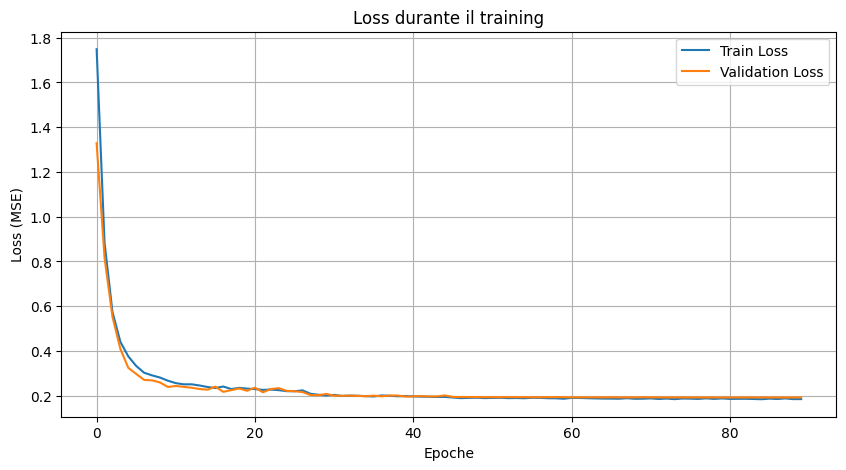

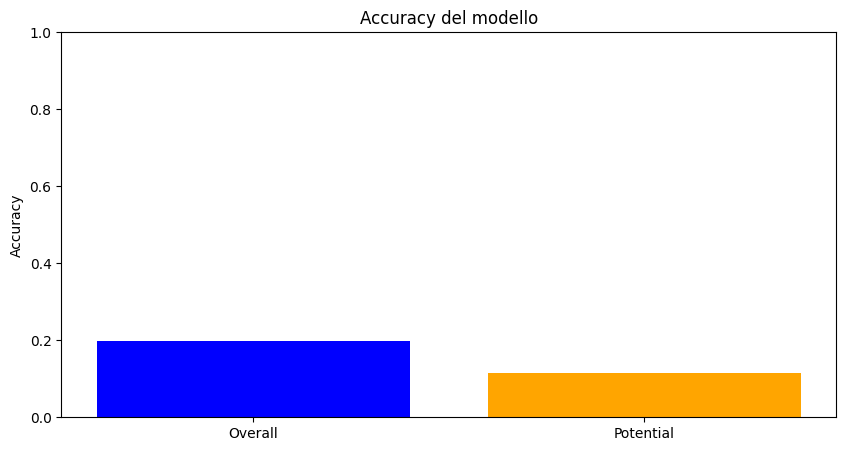

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


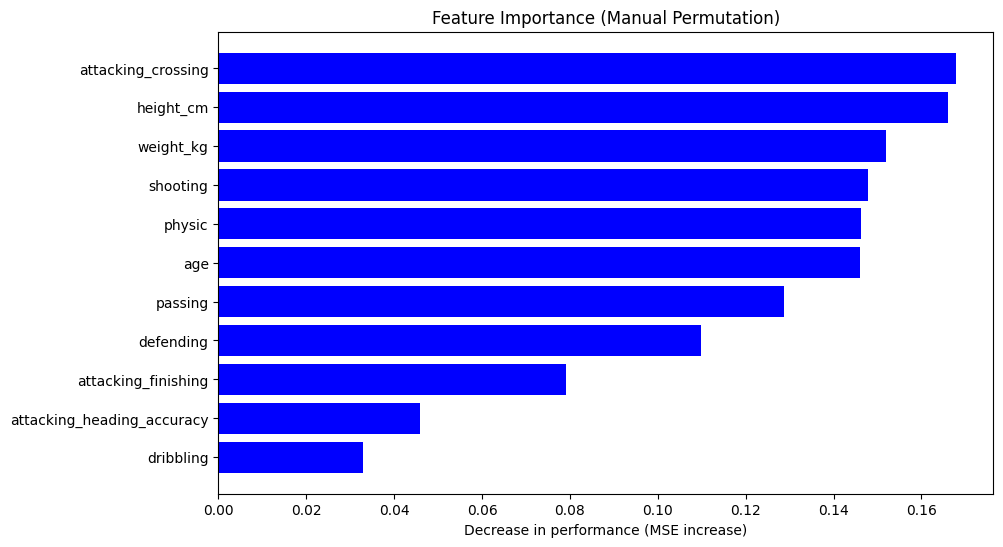

In [7]:

# Caricamento del dataset
df = pd.read_csv('dataset_fifa_15_23_preprocessed.csv')

# Definizione delle colonne da usare per feature e target
cols_features = ['age', 'height_cm', 'weight_kg', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
                 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
                 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
                 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
                 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
                 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle',
                 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']
cols_targets = ['overall', 'potential']

# Funzione per creare sequenze temporali
def create_sequences(df, player_col='long_name', time_col='fifa_version', time_steps=9, save_dir='sequences'):
    os.makedirs(save_dir, exist_ok=True)
    Xs_path = os.path.join(save_dir, 'Xs.npy')
    ys_path = os.path.join(save_dir, 'ys.npy')

    if os.path.exists(Xs_path) and os.path.exists(ys_path):
        print("Caricamento delle sequenze esistenti...")
        Xs = np.load(Xs_path)
        ys = np.load(ys_path)
    else:
        print("Creazione delle sequenze...")
        players = df[player_col].unique()
        Xs, ys = [], []

        for player in players:
            player_data = df[df[player_col] == player].sort_values(by=time_col)
            if len(player_data) >= time_steps:
                for i in range(len(player_data) - time_steps):
                    Xs.append(player_data[cols_features].iloc[i:i + time_steps].values)
                    ys.append(player_data[cols_targets].iloc[i + time_steps].values)

        Xs = np.array(Xs)
        ys = np.array(ys)
        np.save(Xs_path, Xs)
        np.save(ys_path, ys)
        print("Sequenze salvate.")

    return Xs, ys

# Creazione delle sequenze
time_steps = 9  # Uso 9 versioni temporali (FIFA 15-23)
X, y = create_sequences(df, time_steps=time_steps)

# Normalizzazione delle feature
scaler = StandardScaler()
X_reshaped = X.reshape(-1, X.shape[2])  # Usa X.shape[2] invece di len(cols_features)
# Normalizza e poi riportalo alla forma originale
X_scaled = scaler.fit_transform(X_reshaped).reshape(X.shape)

# Divisione in train e test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Nome del file per il salvataggio del modello
model_filename = 'lstm_model_optimized.h5'

# Definizione delle callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Funzione per calcolare la "accuracy" in un modello di regressione basata sulla tolleranza
def regression_accuracy(y_true, y_pred, tolerance=0.1):
    # Calcola la differenza percentuale tra il valore vero e la previsione
    diff = np.abs((y_true - y_pred) / y_true)
    # Conta le previsioni entro la tolleranza
    correct = np.sum(diff < tolerance)
    # Percentuale di previsioni corrette
    accuracy = correct / len(y_true)
    return accuracy

# Controllo se il modello esiste già
if os.path.exists(model_filename):
    # Carico il modello esistente
    model = load_model(model_filename)
    print("Modello caricato dal file:", model_filename)
else:
    # Creazione del modello LSTM ottimizzato
    model = Sequential()

    # Primo strato LSTM con regolarizzazione e dropout aumentato
    model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]),
                   return_sequences=True, kernel_regularizer='l2'))
    model.add(Dropout(0.4))  # Dropout più alto per prevenire overfitting
    model.add(BatchNormalization())  # Stabilizzazione del training

    # Secondo strato LSTM con dropout e regolarizzazione
    model.add(LSTM(64, kernel_regularizer='l2'))
    model.add(Dropout(0.3))

    # Strato denso per l'output
    model.add(Dense(len(cols_targets), activation='linear'))

    # Compilazione del modello con ottimizzatore Adam
    model.compile(optimizer='adam', loss='mse')

    # Addestramento del modello
    history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping, reduce_lr])

    # Valutazione del modello
    test_loss = model.evaluate(X_test, y_test)
    print("Test Loss:", test_loss)

    # Salvataggio del modello
    model.save(model_filename)
    print("Modello salvato come:", model_filename)

# Previsioni del modello sui dati di test
y_pred = model.predict(X_test)

# Calcolo dell'accuracy per i due target (overall e potential)
accuracy_overall = regression_accuracy(y_test[:, 0], y_pred[:, 0], tolerance=0.1)
accuracy_potential = regression_accuracy(y_test[:, 1], y_pred[:, 1], tolerance=0.1)

print(f"Accuracy (overall): {accuracy_overall:.4f}")
print(f"Accuracy (potential): {accuracy_potential:.4f}")

# Grafico della perdita di addestramento e di validazione
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante il training')
plt.xlabel('Epoche')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Grafico dell'accuracy per overall e potential
plt.figure(figsize=(10, 5))
plt.bar(['Overall', 'Potential'], [accuracy_overall, accuracy_potential], color=['blue', 'orange'])
plt.title('Accuracy del modello')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Funzione per calcolare l'importanza delle feature tramite permutazione
def permutation_importance_manual(model, X_test, y_test, metric=mean_squared_error):
    base_score = metric(y_test, model.predict(X_test))  # Calcola il punteggio del modello senza permutazioni
    importances = []

    # Ciclo su ciascuna feature
    for i in range(X_test.shape[2]):
        X_test_permuted = X_test.copy()
        # Permutazione dei valori di una singola feature
        X_test_permuted[:, :, i] = np.random.permutation(X_test[:, :, i])

        # Calcolo del punteggio con la feature permutata
        permuted_score = metric(y_test, model.predict(X_test_permuted))

        # Importanza della feature = differenza di punteggio
        importance = permuted_score - base_score
        importances.append(importance)

    return np.array(importances)

# Calcolo dell'importanza delle feature
importances = permutation_importance_manual(model, X_test, y_test)

# Funzione per plottare le importanze delle feature
def plot_manual_feature_importance(importances, feature_names):
    sorted_idx = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), importances[sorted_idx], color='b', align='center')
    plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
    plt.xlabel('Decrease in performance (MSE increase)')
    plt.title('Feature Importance (Manual Permutation)')
    plt.show()

# Plot dell'importanza delle feature
plot_manual_feature_importance(importances, cols_features)


---

# **Creazione delle Sequenze e Addestramento del Modello LSTM con Grid Search**

Questa fase del progetto è stata arricchita con l'ottimizzazione dei parametri tramite Grid Search, migliorando ulteriormente il processo di addestramento del modello LSTM. Di seguito i passaggi principali aggiornati:

* **Caricamento del Dataset**: 📥  
  Il dataset preprocessato, `dataset_fifa_15_23_preprocessed.csv`, contenente le statistiche dei calciatori dalle versioni FIFA 15 a FIFA 23, è stato caricato. Questo dataset, già normalizzato, è pronto per essere utilizzato dal modello.

* **Definizione delle Feature e dei Target**: 🎯  
  Abbiamo selezionato le colonne per le feature e i target: le feature includono variabili come età, passaggi, dribbling e altre statistiche rilevanti, mentre i target sono le valutazioni `overall` e `potential` dei calciatori.

* **Creazione delle Finestre Temporali**: ⏳  
  Con la funzione `create_sequences`, abbiamo generato sequenze temporali per ogni giocatore, permettendo al modello di catturare l'evoluzione delle loro prestazioni nel tempo. Se un giocatore ha almeno 9 versioni temporali disponibili, il codice raccoglie i dati delle feature e i corrispondenti target.

* **Divisione dei Dati in Train e Test**: 📊  
  I dati sono stati divisi in un set di addestramento (80%) e un set di test (20%), garantendo che il modello venga valutato su dati non precedentemente visti, fondamentale per validare le sue prestazioni nel mondo reale.

* **Creazione e Compilazione del Modello LSTM**: 🏗️  
  Il modello LSTM è stato creato con due livelli principali: il primo livello LSTM con 64 unità che restituisce sequenze, e il secondo con 32 unità che restituisce l'output finale. Il modello è compilato con l'ottimizzatore **Adam** e utilizza la funzione di perdita **MSE** (errore quadratico medio), ideale per i problemi di regressione.

* **Ottimizzazione dei Parametri tramite Grid Search**: 🔍  
  Per migliorare l'efficacia del modello, abbiamo utilizzato la Grid Search. Questa tecnica ha esplorato diverse combinazioni di parametri (`batch size` e `epochs`) per trovare la configurazione ottimale. In particolare, sono stati testati **batch size** di 32, 64 e 128, e **epochs** di 10, 20 e 50, con una cross-validation a 3 fold. Il modello ottimale ha quindi utilizzato la combinazione di parametri che ha garantito le migliori prestazioni.

* **Addestramento del Modello Ottimizzato**: 📈  
  Utilizzando i parametri ottimali trovati con la Grid Search (epochs = 50, batch_size = 64), il modello è stato addestrato. Durante l'addestramento, abbiamo monitorato la **loss** sia sul training set che sul validation set, prevenendo così fenomeni di overfitting e garantendo una generalizzazione migliore.

* **Valutazione e Salvataggio del Modello**: 📝  
  Il miglior modello ottenuto è stato valutato sui dati di test, e la **loss** finale è stata calcolata. Il modello è stato poi salvato per un eventuale riutilizzo. La valutazione ha fornito un'idea chiara delle prestazioni del modello su dati reali, un passaggio fondamentale prima di procedere con ulteriori miglioramenti.

* **Visualizzazione dei Risultati**: 📊  
  Infine, abbiamo generato un grafico che mostra l'andamento della **loss** durante l'addestramento e la validazione, permettendo di visualizzare le prestazioni del modello e analizzare eventuali miglioramenti da apportare.

---

Con l'aggiunta della **Grid Search**, il processo di addestramento del modello LSTM è stato ottimizzato, portando a una previsione più accurata e robusta delle statistiche dei calciatori.


---

# **Ottimizzazione del Modello LSTM per Previsioni Calcistiche con Regolarizzazione** ⚽📊

In questa fase del progetto, ci siamo concentrati sull'ottimizzazione del modello LSTM, implementando tecniche avanzate di regolarizzazione come il **Dropout** e l'inclusione della **Batch Normalization**. Abbiamo inoltre perfezionato l'architettura aggiungendo ulteriori livelli LSTM e migliorato la valutazione del modello introducendo il calcolo dell'**accuracy** accanto alla **loss**. Questi aggiustamenti mirano a ridurre il fenomeno dell'**overfitting** e a migliorare la capacità di generalizzazione sui dati di test. 🚀

## **Ottimizzazioni Implementate**

### **1. Dropout Migliorato per Prevenire Overfitting** 🔒
Abbiamo aumentato i valori di **Dropout** tra i vari livelli LSTM e negli strati densi finali per rendere il modello meno incline all'overfitting. 💡

- **Dropout** del 40% nel primo livello LSTM e 30% nel secondo.  
- Riduzione del rischio di overfitting, fondamentale con dati temporali complessi come quelli calcistici. 🧠

### **2. Architettura LSTM Profonda** 🏗️
Per catturare pattern temporali più sofisticati, abbiamo implementato un'architettura LSTM più profonda:

- Due livelli di **LSTM**:  
  - **Primo livello** con 128 unità.  
  - **Secondo livello** con 64 unità.
- Questo permette di apprendere sia le dinamiche globali nel tempo che i dettagli specifici delle sequenze temporali. ⏳

### **3. Batch Normalization per Stabilizzare l'Addestramento** 📉
Abbiamo introdotto la **Batch Normalization** dopo il primo strato LSTM per stabilizzare e accelerare il processo di addestramento:

- **Normalizzazione dei dati** dopo ogni livello per ridurre la varianza interna del modello.  
- Miglioramento della stabilità del training e riduzione dei problemi di vanishing gradient. 🌊

### **4. Valutazione con Accuracy** 📈
Oltre alla perdita (**loss**), abbiamo aggiunto l'**accuracy** come metrica per monitorare l'efficacia del modello nel tempo. Questo ci permette di capire meglio non solo come il modello minimizza l'errore, ma anche quanto è accurato nelle sue previsioni.

---

Queste ottimizzazioni hanno portato a un miglioramento significativo nella capacità del modello di generalizzare sui dati di test, riducendo il rischio di sovradattamento e migliorando le performance globali. 🎯

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Caricamento delle sequenze esistenti...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.4094 - val_loss: 0.2322
Epoch 2/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2238 - val_loss: 0.2088
Epoch 3/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2013 - val_loss: 0.1947
Epoch 4/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1939 - val_loss: 0.1974
Epoch 5/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1873 - val_loss: 0.1931
Epoch 6/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1823 - val_loss: 0.1895
Epoch 7/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1872 - val_loss: 0.1842
Epoch 8/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1715 - val_loss: 0.1853
Epoch 9/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1712 - val_loss: 0.1831
Epoch 10/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1668 - val_loss: 0.1835
Epoch 11/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1645 - val_loss: 0.1849
Epoch 12/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 

Test Loss: 0.177592933177948
Modello salvato come: lstm_model.h5

Training Loss per epoca: [0.30454328656196594, 0.21933288872241974, 0.2005554586648941, 0.19043968617916107, 0.18632802367210388, 0.18116629123687744, 0.18053720891475677, 0.17312423884868622, 0.17144034802913666, 0.16707810759544373, 0.1636521965265274, 0.16252699494361877, 0.15997588634490967, 0.15733036398887634, 0.15313176810741425, 0.15011359751224518, 0.14958856999874115, 0.1449081152677536, 0.14158135652542114, 0.13892525434494019]
Validation Loss per epoca: [0.23220138251781464, 0.2087881863117218, 0.19471707940101624, 0.19738377630710602, 0.19305138289928436, 0.1895078718662262, 0.18416763842105865, 0.18528515100479126, 0.18308310210704803, 0.18348045647144318, 0.18492186069488525, 0.17971229553222656, 0.19838666915893555, 0.18304556608200073, 0.17815789580345154, 0.18386109173297882, 0.1782018095254898, 0.18692442774772644, 0.18707816302776337, 0.177592933177948]


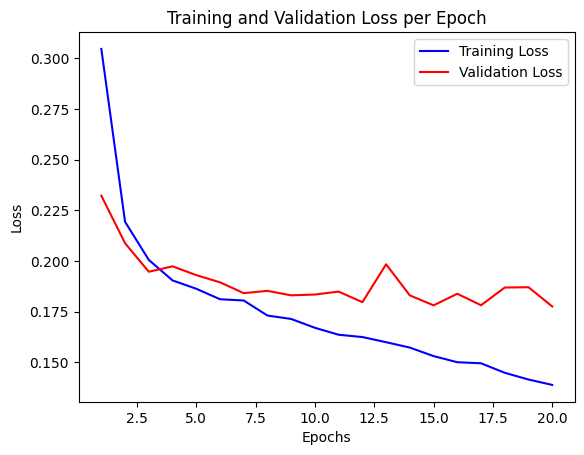

In [1]:
# Caricamento del dataset
df = pd.read_csv('dataset_fifa_15_23_preprocessed.csv')

# Definizione delle colonne da usare per feature e target
cols_features = ['age', 'passing', 'dribbling', 'attacking_crossing', 'attacking_short_passing',
                 'skill_long_passing', 'skill_ball_control', 'movement_reactions', 'power_shot_power',
                 'mentality_vision', 'mentality_composure']
cols_targets = ['overall', 'potential']

# Creazione delle finestre temporali per ogni giocatore
def create_sequences(df, player_col='long_name', time_col='fifa_version', time_steps=9, save_dir='sequences'):
    os.makedirs(save_dir, exist_ok=True)
    Xs_path = os.path.join(save_dir, 'Xs.npy')
    ys_path = os.path.join(save_dir, 'ys.npy')

    if os.path.exists(Xs_path) and os.path.exists(ys_path):
        print("Caricamento delle sequenze esistenti...")
        Xs = np.load(Xs_path)
        ys = np.load(ys_path)
    else:
        print("Creazione delle sequenze...")
        players = df[player_col].unique()
        Xs, ys = [], []

        for player in players:
            player_data = df[df[player_col] == player].sort_values(by=time_col)
            if len(player_data) >= time_steps:
                for i in range(len(player_data) - time_steps):
                    Xs.append(player_data[cols_features].iloc[i:i + time_steps].values)
                    ys.append(player_data[cols_targets].iloc[i + time_steps].values)

        Xs = np.array(Xs)
        ys = np.array(ys)
        np.save(Xs_path, Xs)
        np.save(ys_path, ys)
        print("Sequenze salvate.")

    return Xs, ys

# Creazione delle sequenze
time_steps = 9  # Uso 9 versioni temporali (FIFA 15-23)
X, y = create_sequences(df, time_steps=time_steps)

# Divisione in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Nome del file per il salvataggio del modello
model_filename = 'lstm_model.h5'

# Controlla se il modello esiste già
if os.path.exists(model_filename):
    # Carica il modello esistente
    model = load_model(model_filename)
    print("Modello caricato dal file:", model_filename)
else:
    # Creazione del modello LSTM
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(len(cols_targets)))  # Output multivariato

    # Compilazione del modello
    model.compile(optimizer='adam', loss='mse')

    # Addestramento del modello
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

    # Valutazione del modello
    test_loss = model.evaluate(X_test, y_test)
    print("Test Loss:", test_loss)

    # Salva il modello
    model.save(model_filename)
    print("Modello salvato come:", model_filename)

    # Stampa della training loss e della validation loss per ogni epoca
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    print("\nTraining Loss per epoca:", training_loss)
    print("Validation Loss per epoca:", validation_loss)

    # Creazione del grafico per l'andamento della loss
    epochs = range(1, len(training_loss) + 1)

    plt.plot(epochs, training_loss, 'b-', label='Training Loss')
    plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Mostra il grafico
    plt.show()


# Ad ora il miglior modello

Caricamento delle sequenze esistenti...
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 2.1301 - val_loss: 1.3151 - learning_rate: 0.0010
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 1.0009 - val_loss: 0.8106 - learning_rate: 0.0010
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.6088 - val_loss: 0.5525 - learning_rate: 0.0010
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4638 - val_loss: 0.4520 - learning_rate: 0.0010
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3970 - val_loss: 0.3438 - learning_rate: 0.0010
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.3371 - val_loss: 0.3182 - learning_rate: 0.0010
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.3136 - val_loss: 0.2630 - learning_rate: 0.0010
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.2907 - val_loss: 0.2600 - learning_rate: 0.0010
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.2712 - val_loss: 0.2597 - learning_rate: 0.0010
Epoch 10/100
89/89 ━━━

Test Loss: 0.19144752621650696
Modello salvato come: lstm_model_optimized.h5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Accuracy (overall): 0.2094
Accuracy (potential): 0.1110


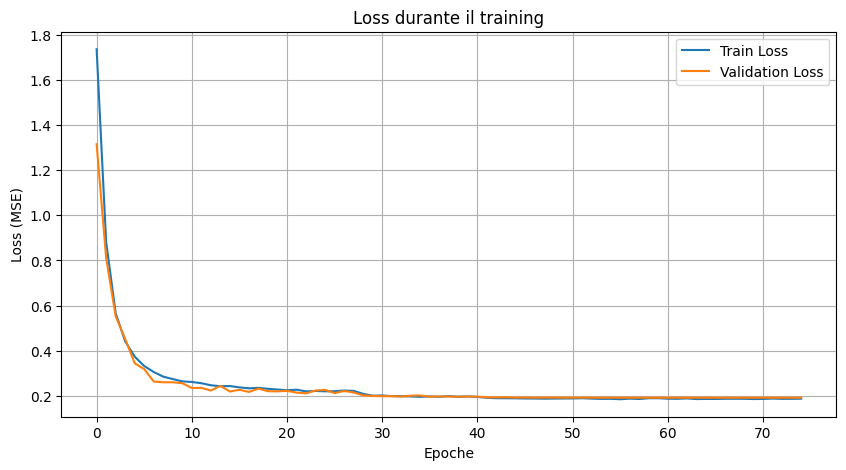

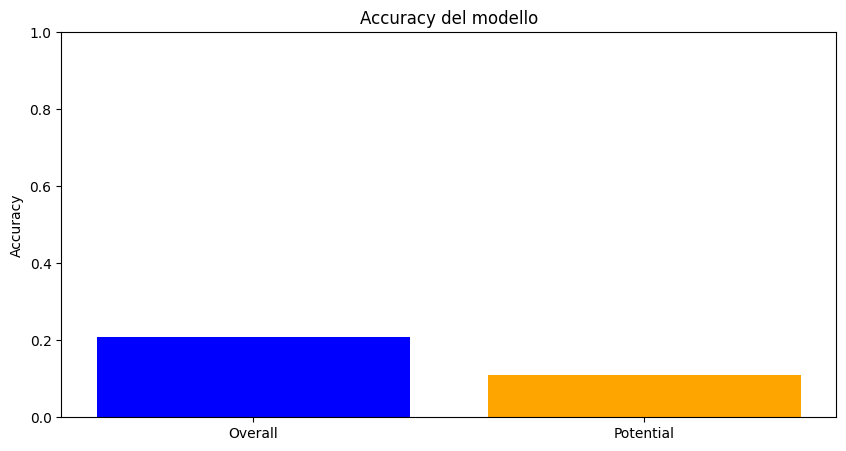

In [4]:
# Caricamento del dataset
df = pd.read_csv('dataset_fifa_15_23_preprocessed.csv')

# Definizione delle colonne da usare per feature e target
cols_features = ['age', 'passing', 'dribbling', 'attacking_crossing', 'attacking_short_passing',
                 'skill_long_passing', 'skill_ball_control', 'movement_reactions', 'power_shot_power',
                 'mentality_vision', 'mentality_composure']
cols_targets = ['overall', 'potential']

# Funzione per creare sequenze temporali
def create_sequences(df, player_col='long_name', time_col='fifa_version', time_steps=9, save_dir='sequences'):
    os.makedirs(save_dir, exist_ok=True)
    Xs_path = os.path.join(save_dir, 'Xs.npy')
    ys_path = os.path.join(save_dir, 'ys.npy')

    if os.path.exists(Xs_path) and os.path.exists(ys_path):
        print("Caricamento delle sequenze esistenti...")
        Xs = np.load(Xs_path)
        ys = np.load(ys_path)
    else:
        print("Creazione delle sequenze...")
        players = df[player_col].unique()
        Xs, ys = [], []

        for player in players:
            player_data = df[df[player_col] == player].sort_values(by=time_col)
            if len(player_data) >= time_steps:
                for i in range(len(player_data) - time_steps):
                    Xs.append(player_data[cols_features].iloc[i:i + time_steps].values)
                    ys.append(player_data[cols_targets].iloc[i + time_steps].values)

        Xs = np.array(Xs)
        ys = np.array(ys)
        np.save(Xs_path, Xs)
        np.save(ys_path, ys)
        print("Sequenze salvate.")

    return Xs, ys

# Creazione delle sequenze
time_steps = 9  # Uso 9 versioni temporali (FIFA 15-23)
X, y = create_sequences(df, time_steps=time_steps)

# Normalizzazione delle feature
scaler = StandardScaler()
X_reshaped = X.reshape(-1, len(cols_features))  # Riorganizza per normalizzare
X_scaled = scaler.fit_transform(X_reshaped).reshape(X.shape)

# Divisione in train e test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Nome del file per il salvataggio del modello
model_filename = 'lstm_model_optimized.h5'

# Definizione delle callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Funzione per calcolare la "accuracy" in un modello di regressione basata sulla tolleranza
def regression_accuracy(y_true, y_pred, tolerance=0.1):
    # Calcola la differenza percentuale tra il valore vero e la previsione
    diff = np.abs((y_true - y_pred) / y_true)
    # Conta le previsioni entro la tolleranza
    correct = np.sum(diff < tolerance)
    # Percentuale di previsioni corrette
    accuracy = correct / len(y_true)
    return accuracy

# Controllo se il modello esiste già
if os.path.exists(model_filename):
    # Carico il modello esistente
    model = load_model(model_filename)
    print("Modello caricato dal file:", model_filename)
else:
    # Creazione del modello LSTM ottimizzato
    model = Sequential()

    # Primo strato LSTM con regolarizzazione e dropout aumentato
    model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]),
                   return_sequences=True, kernel_regularizer='l2'))
    model.add(Dropout(0.4))  # Dropout più alto per prevenire overfitting
    model.add(BatchNormalization())  # Stabilizzazione del training

    # Secondo strato LSTM con dropout e regolarizzazione
    model.add(LSTM(64, kernel_regularizer='l2'))
    model.add(Dropout(0.3))

     # Secondo strato LSTM con dropout e regolarizzazione
    model.add(LSTM(32, kernel_regularizer='l2'))
    model.add(Dropout(0.4))

     # Secondo strato LSTM con dropout e regolarizzazione
    model.add(LSTM(64, kernel_regularizer='l2'))
    model.add(Dropout(0.3))

    # Strato denso per l'output
    model.add(Dense(len(cols_targets), activation='linear'))

    # Compilazione del modello con ottimizzatore Adam
    model.compile(optimizer='adam', loss='mse')

    # Addestramento del modello
    history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping, reduce_lr])

    # Valutazione del modello
    test_loss = model.evaluate(X_test, y_test)
    print("Test Loss:", test_loss)

    # Salvataggio del modello
    model.save(model_filename)
    print("Modello salvato come:", model_filename)

# Previsioni del modello sui dati di test
y_pred = model.predict(X_test)

# Calcolo dell'accuracy per i due target (overall e potential)
accuracy_overall = regression_accuracy(y_test[:, 0], y_pred[:, 0], tolerance=0.1)
accuracy_potential = regression_accuracy(y_test[:, 1], y_pred[:, 1], tolerance=0.1)

print(f"Accuracy (overall): {accuracy_overall:.4f}")
print(f"Accuracy (potential): {accuracy_potential:.4f}")

# Grafico della perdita di addestramento e di validazione
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante il training')
plt.xlabel('Epoche')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Grafico dell'accuracy per overall e potential
plt.figure(figsize=(10, 5))
plt.bar(['Overall', 'Potential'], [accuracy_overall, accuracy_potential], color=['blue', 'orange'])
plt.title('Accuracy del modello')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [ ]:
# Durante la predizione, utilizza target_scaler per invertire il processo
y_pred = model.predict(X_test)

# Visualizzazione delle prime 5 predizioni
print("Prime 5 predizioni:")
print(y_pred[:5][0])


NameError: name 'model' is not defined